# Project: Heart Disease Classification

This notebook covers:
- Loading the data
- Simple EDA
- Feature Engineering and Outlier detection
- Feature scaling
- Creating two  models

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pickle

#preprocessing module
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split ,StratifiedKFold,GridSearchCV

##feature Scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
## feature selection
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

###  Load the dataset

In [2]:
# Load files into a pandas dataframe
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploratory Data Analysis

In [3]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.shape

(918, 12)

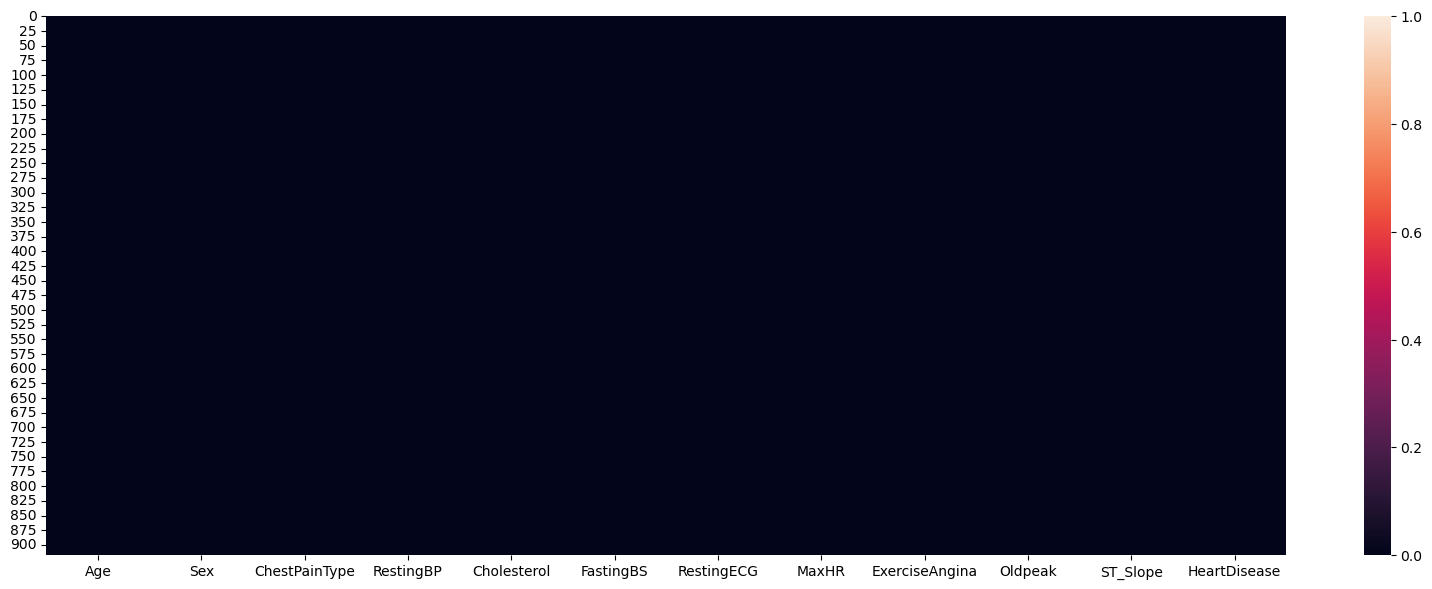

In [5]:
#check missing values
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df.isnull(), vmin=0, vmax = 1)

- there seems to be no missing data

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.nunique() 

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
# checking for values of zero

df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


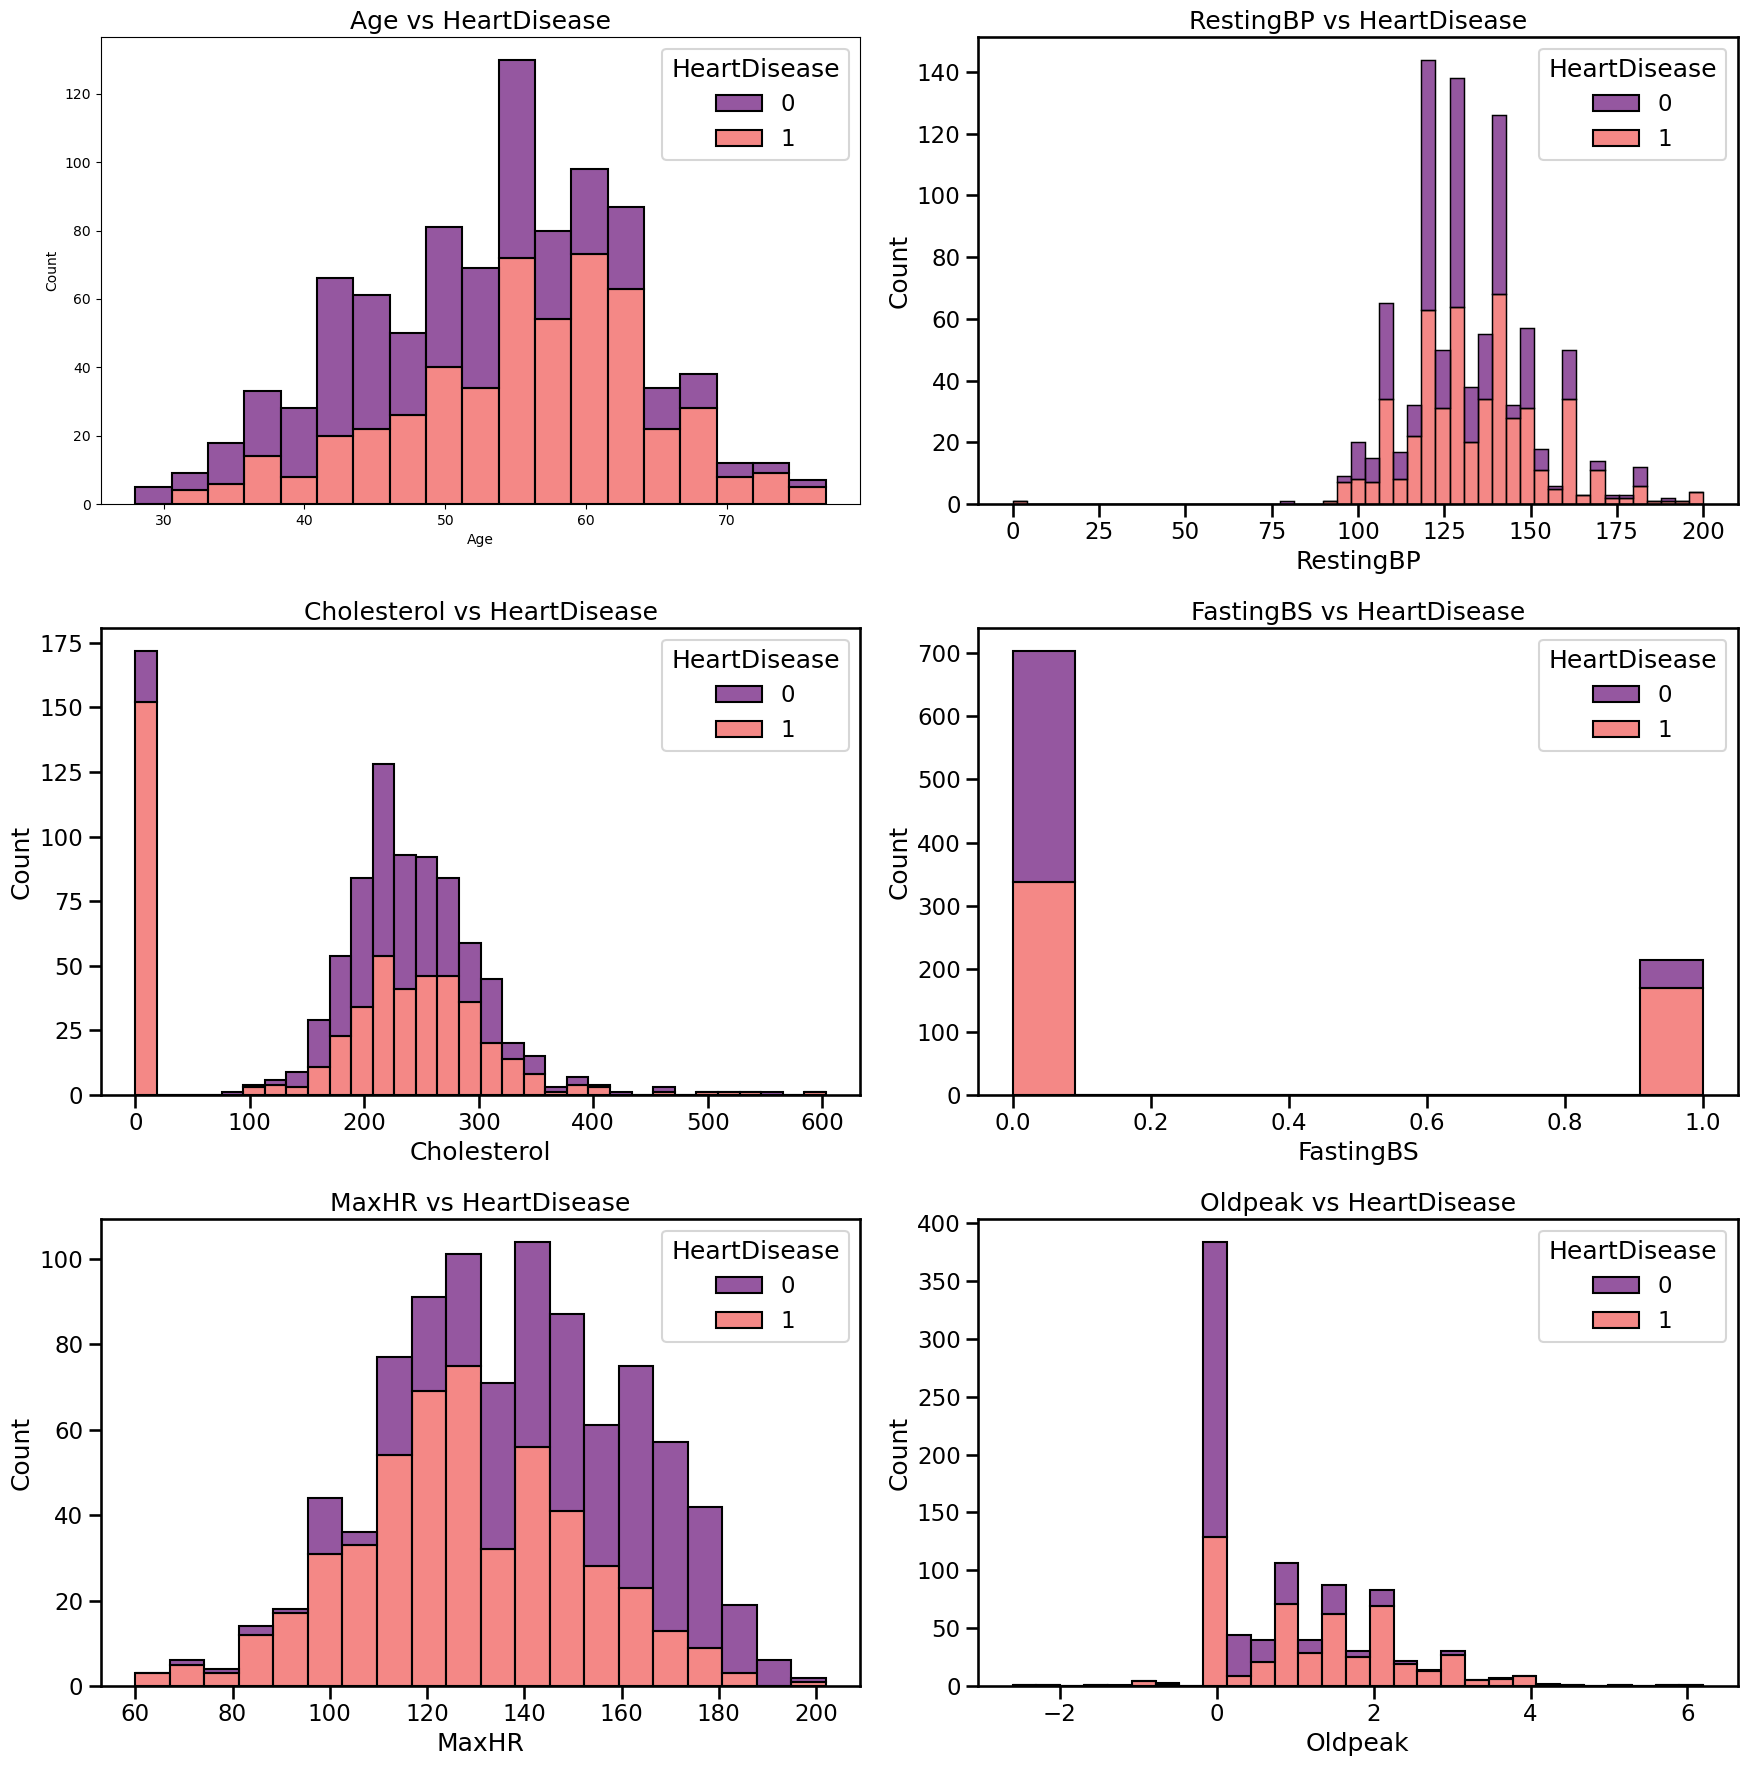

In [10]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

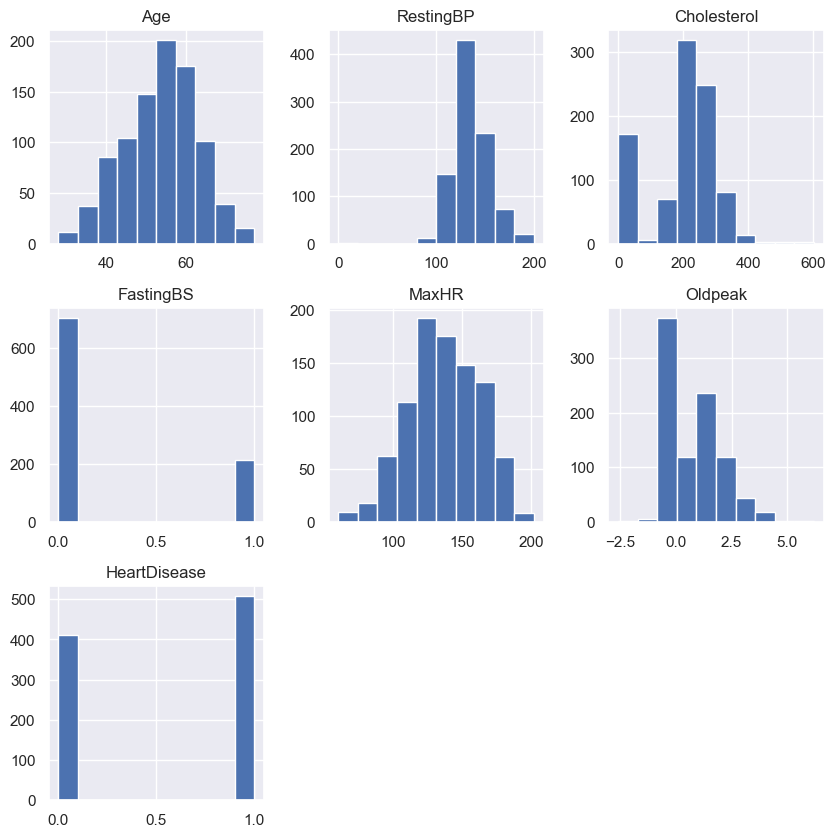

In [11]:
sns.set()
df.hist(figsize=(10,10))
plt.show()

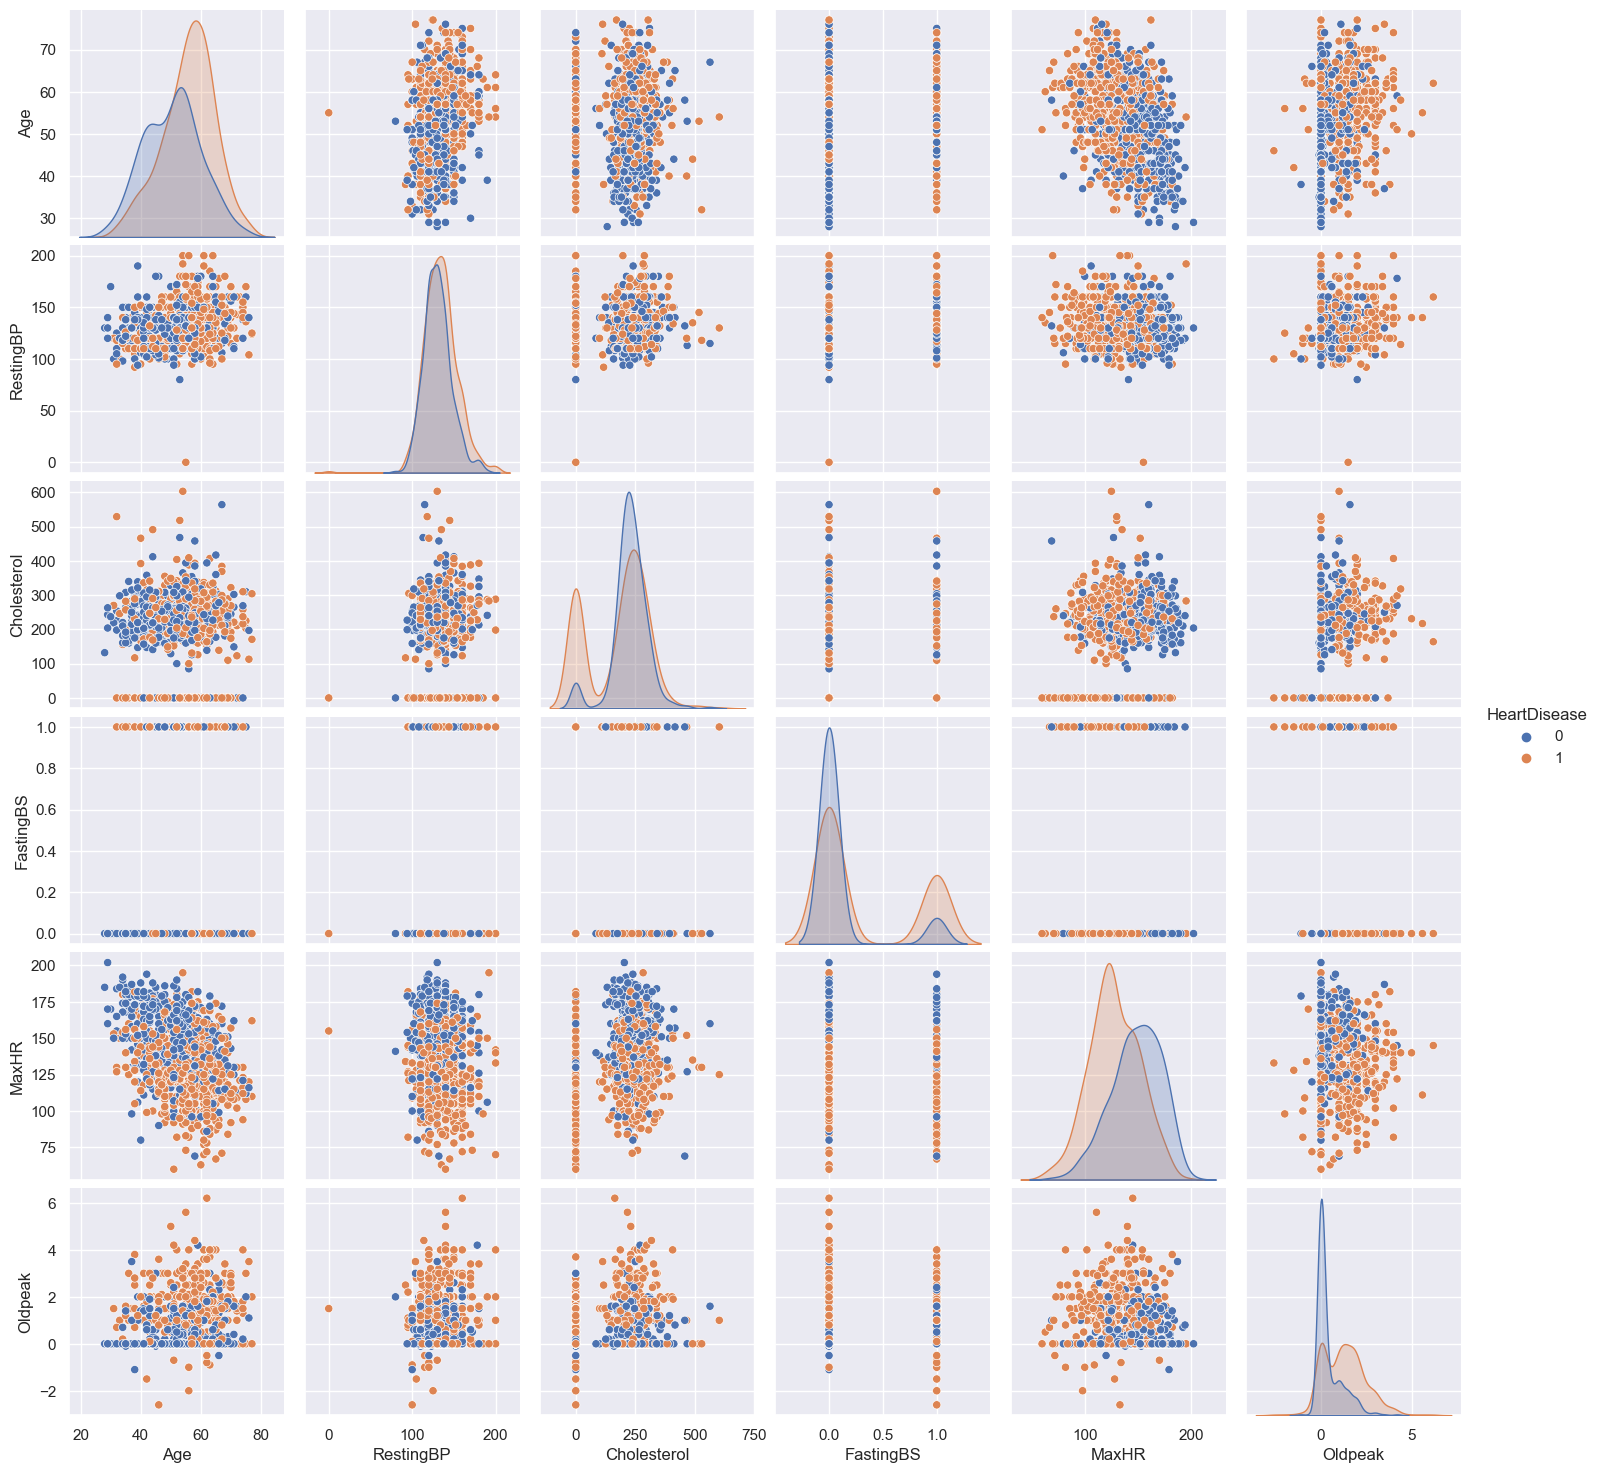

In [12]:
sns.pairplot(df,hue='HeartDisease')

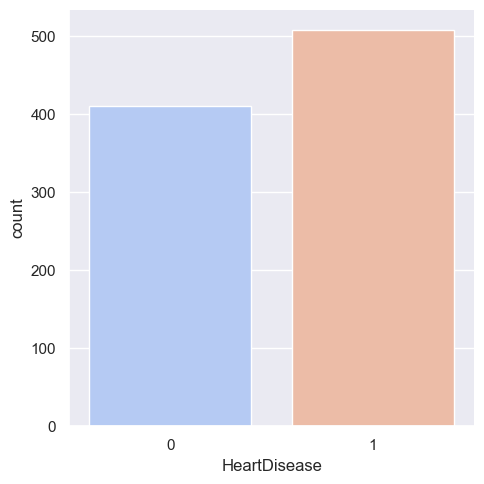

In [13]:
# Explore Target distribution 
sns.catplot(x="HeartDisease", kind="count", data=df,palette='coolwarm')

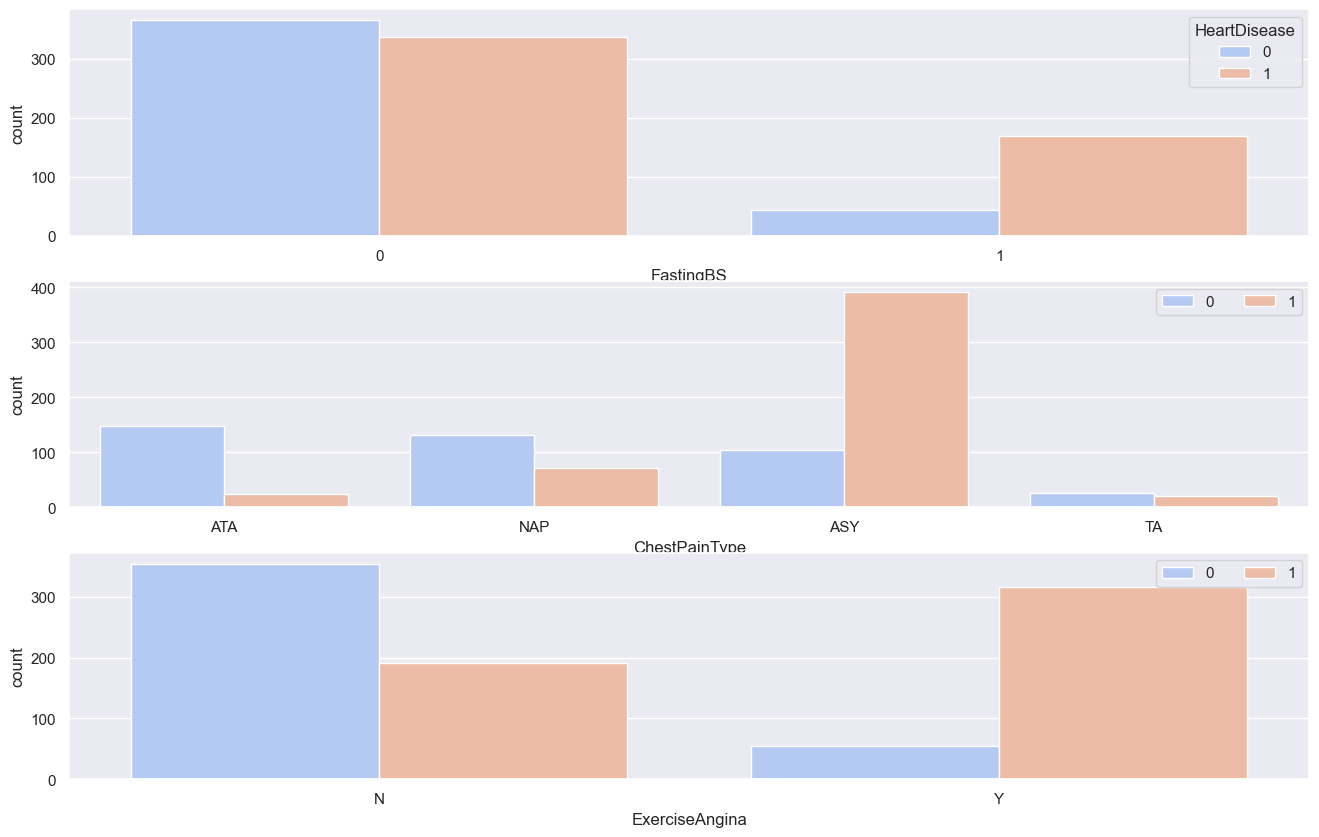

In [14]:
plt.figure(figsize = [16, 10])

# subplot 1: heart disease count by fastingbs
plt.subplot(3, 1, 1)
sns.countplot(x="FastingBS", data=df,hue='HeartDisease', palette = "coolwarm")

# subplot 2:  heart disease count by chest pain type
ax = plt.subplot(3, 1, 2)
sns.countplot(x="ChestPainType", data=df,hue='HeartDisease',  palette = "coolwarm")
ax.legend(ncol = 2)

# subplot 3: heart disease count by ExerciseAngina
ax = plt.subplot(3, 1, 3)
sns.countplot(x="ExerciseAngina", data=df,hue='HeartDisease',  palette = "coolwarm")
ax.legend(loc = 1, ncol = 2) 

plt.show()

##  Outlier detection

In [15]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- there are outliers in some of the columns

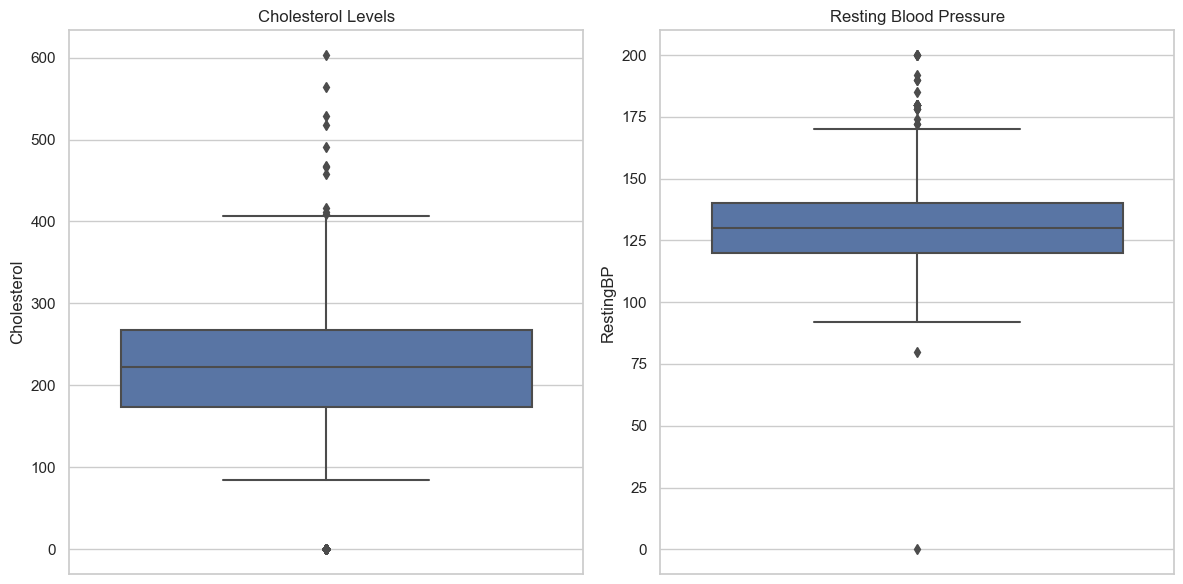

In [16]:
sns.set(style="whitegrid")

# Create a figure and axes for multiple plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for Cholesterol
sns.boxplot(ax=axes[0], y=df["Cholesterol"])
axes[0].set_title('Cholesterol Levels')

# Boxplot for RestingBP
sns.boxplot(ax=axes[1], y=df["RestingBP"])
axes[1].set_title('Resting Blood Pressure')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##  Feature Engineering 

In [19]:
df['Cholesterol'].replace(to_replace=0, value=np.nan, inplace=True)

# Calculate the mean of the 'Cholesterol' column, ignoring NaN values
mean_cholesterol = df['Cholesterol'].mean()

# Replace NaN values with the calculated mean
df['Cholesterol'].fillna(mean_cholesterol, inplace=True)

### Outlier removal

In [21]:
# creating a function to remove values greater than two standard deviations from the mean

def remove_outliers(data, column):
    mean=data[column].std()
    std=data[column].mean()

    #generating the threshold
    threshold=mean+std*2

    #getting the data below the threshold

    data=data[data[column] <=threshold]

    return data


In [22]:
#removing the outiers

df = remove_outliers(df, 'Cholesterol')
df = remove_outliers(df, 'RestingBP')

## Data preprocessing  and model building

In [23]:
X= df.drop('HeartDisease', axis=1)
y = df.HeartDisease

## model training and hyperparameter tuning

In [25]:
from sklearn.compose import ColumnTransformer
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Preprocessing for numerical data: scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])




In [26]:
params ={}
params['SVC__C']= [0.1,1, 10, 100]
params['SVC__gamma']= [1,0.1,0.01,0.001]
params['SVC__kernel']= ['rbf']

In [27]:
# step_2=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
#     ("scaling",StandardScaler()),
#       ("SVC",SVC())]
# Define the model
model1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ("SVC",SVC())
])

In [28]:
# Split train_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [29]:
# pipe_2=Pipeline(step_2)

In [30]:
skf = StratifiedKFold(5, shuffle=True, random_state=1)

In [31]:
grid = GridSearchCV(model1,params,refit=True,verbose=2,cv=skf)

In [32]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.0s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.0s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.0s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.0s
[CV] END ..........SVC__C=0.1, SVC__gamma=1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END ........SVC__C=0.1, SVC__gamma=0.1, SVC__kernel=rbf; total time=   0.0s
[CV] END .......SVC__C=0.1, SVC__gamma=0.01, SVC__kernel=rbf; total time=   0.0s
[CV] END .......SVC__C=0.1, SVC__gamma=0.01, SVC

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'MaxHR',
                                                                          'Oldpeak']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'FastingBS',
                                                                          'RestingECG',
                                                                          'ExerciseAngina',
                                                                          'ST_Slope'])])),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': [0.1, 1, 10, 100],
                         'SVC__gamma': [1, 0.1, 0.01, 0.001],
                         'SVC__kernel': ['rbf']},
             verbose=2)

In [33]:
svm_pred=grid.predict(X_test)

In [34]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


## model evaluation

In [35]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       124
           1       0.89      0.89      0.89       151

    accuracy                           0.88       275
   macro avg       0.88      0.88      0.88       275
weighted avg       0.88      0.88      0.88       275



In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=103, stop=300, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid with the correct parameter names
random_grid = {
    'RF__n_estimators': n_estimators,
    'RF__max_features': max_features,
    'RF__max_depth': max_depth,
    'RF__min_samples_split': min_samples_split,
    'RF__min_samples_leaf': min_samples_leaf,
    'RF__bootstrap': bootstrap
}

In [37]:
# step_3 = [
#     ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
#     ("scaling", StandardScaler()),
#     ("RF", RandomForestClassifier())
# ]
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ("RF", RandomForestClassifier())
])
# Create the pipeline
# pipe_3 = Pipeline(step_3)

# Set up the RandomizedSearchCV
forest = RandomizedSearchCV(
    estimator=model2,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
forest.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'RestingBP',
                                                                                'Cholesterol',
                                                                                'MaxHR',
                                                                                'Oldpeak']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',...
                                             ('RF', RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'RF__bootstrap': [True, False],
                                        'RF__max_depth': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90, 100,
                                                          110, None],
                                        'RF__max_features': ['auto', 'sqrt'],
                                        'RF__min_samples_leaf': [1, 2, 4],
                                        'RF__min_samples_split': [2, 5, 10],
                                        'RF__n_estimators': [103, 124, 146, 168,
                                                             190, 212, 234, 256,
                                                             278, 300]},
                   random_state=42, verbose=2)

In [38]:
forest.best_params_

{'RF__n_estimators': 190,
 'RF__min_samples_split': 2,
 'RF__min_samples_leaf': 2,
 'RF__max_features': 'sqrt',
 'RF__max_depth': 60,
 'RF__bootstrap': True}

In [39]:
best_params = forest.best_params_
print("Best parameters:", best_params)

# Best estimator
best_model = forest.best_estimator_
print("Best model:", best_model)

Best parameters: {'RF__n_estimators': 190, 'RF__min_samples_split': 2, 'RF__min_samples_leaf': 2, 'RF__max_features': 'sqrt', 'RF__max_depth': 60, 'RF__bootstrap': True}
Best model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                      

## model evaluation

In [40]:
RF_pred = best_model.predict(X_test)

In [41]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       124
           1       0.88      0.87      0.88       151

    accuracy                           0.87       275
   macro avg       0.86      0.86      0.86       275
weighted avg       0.87      0.87      0.87       275



### Feature Importance

In [42]:
#Encoding categorical Data
df['Sex'].replace( { 'M':1, 'F':0} , inplace=True)
df['RestingECG'].replace( { 'Normal':1, 'ST':2, 'LVH':3} , inplace=True)
df['ExerciseAngina'].replace( { 'N':0, 'Y':1} , inplace=True)
df['ST_Slope'].replace( { 'Up':1, 'Flat':2, 'Down':3} , inplace=True)
df['ChestPainType'].replace( { 'ATA':1, 'NAP':2, 'ASY':3, 'TA':4} , inplace=True)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
X= df.drop('HeartDisease', axis=1)
y = df.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

           Feature  Gini Importance
10        ST_Slope         0.243104
9          Oldpeak         0.126314
2    ChestPainType         0.116386
7            MaxHR         0.108615
4      Cholesterol         0.084027
0              Age         0.079275
8   ExerciseAngina         0.076343
3        RestingBP         0.073098
1              Sex         0.043638
6       RestingECG         0.025412
5        FastingBS         0.023788


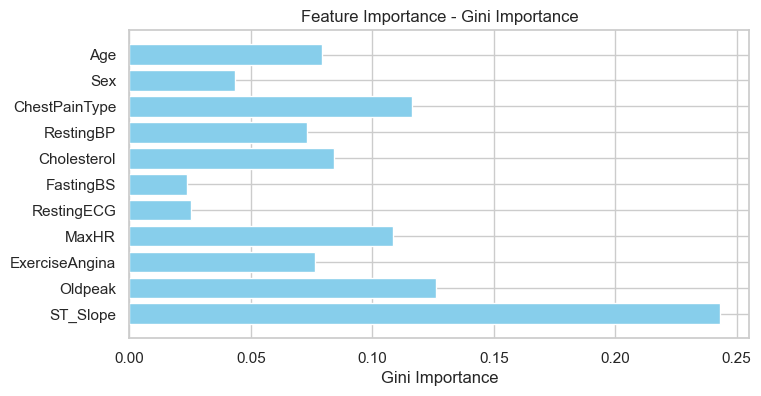

In [43]:
plt.figure(figsize=(8, 4))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

### Pickle file created

In [44]:
pickle_out = open("model.pkl","wb")
pickle.dump(grid,pickle_out)
pickle_out.close()